# Exampe 4.1: Load effects in three-story shear frame
## Define structural properties
This example will study the shear force and bending moment in one of the columns between degrees of freedom 1 and 2 in a three-story shear frame. The legs in the frame are RHS 100x100x6.3 with second moment of area $I_y = 3.36 \cdot 10^{-6} \: \text{m}^4$ . The height of each story is $L = 4 \: \text{m}$ and the mass of each floor is $m=1000  \: \text{kg}$. The damping coefficients of the two dampers are $c_1 = 1000 \: \text{N}/\text{(m/s)}$ and $c_2 = 2000 \: \text{N}/\text{(m/s)}$. Set $E = 210\cdot 10^3 \: \text{MPa}$ 


<img src="./figures/Fig_4_1.svg">

## Define the cross-spectral density matrix of the loads
The system has three degrees of freedom, and the cross-spectral density matrix defines the three stochastic loads:

$$ \mathbf{S_X}(\omega) = \left[ \begin{array}{c c c}
{S _{X_1}(\omega)} & {S _{X_1X_2}(\omega)} & {S _{X_1X_3}(\omega)} \\
{S_{X_2X_1}(\omega)}&{S_{X_2}(\omega)} & {S_{X_2X_3}(\omega)} \\
{S_{X_3X_1}(\omega)}&{S_{X_3X_2}(\omega)} & {S_{X_3}(\omega)} \\
\end{array} \right] $$

The components in the cross-spectral density matrix are defined as follows.

$$ S_{X_1}(\omega)= \left\{ \begin{array} {c} 10^3 \quad  |\omega|\le 30 \\ 0 \quad |\omega| > 30 \end{array} \right. $$

$$ S_{X_2}(\omega)= \left\{ \begin{array} {c} 10^3 \quad  |\omega|\le 30 \\ 0 \quad |\omega| > 30 \end{array} \right. $$

$$ S_{X_3}(\omega)= \left\{ \begin{array} {c} 10^3 \quad  |\omega|\le 30 \\ 0 \quad |\omega| > 30 \end{array} \right. $$

$$ S_{X_{1}X_{2}}(\omega)=S_{X_{2}X_{1}}(\omega) =\left\{ \begin{array} {c} -0.5 \cdot 10^3 \quad  |\omega|\le 30 \\ 0 \quad \omega > 30 \end{array} \right. $$

$$ S_{X_{1}X_{3}}(\omega)=S_{X_{3}X_{1}}(\omega) =\left\{ \begin{array} {c} -0.25 \cdot 10^3 \quad  |\omega|\le 30 \\ 0 \quad |\omega| > 30 \end{array} \right. $$

$$ S_{X_{2}X_{3}}(\omega)=S_{X_{3}X_{2}}(\omega) =\left\{ \begin{array} {c} -0.25 \cdot 10^3 \quad  |\omega|\le 30 \\ 0 \quad |\omega| > 30 \end{array} \right. $$

Note that the elements on the diagonal of the matrix are auto-spectral densities, while the off-diagonal terms are cross-spectral densities. The python implementation is shown below.

## Question 1: Calculate the natural frequencies and damping ratios of the structure
The equation of motion for the dynamic system reads

$$ \mathbf{M} \ddot{\mathbf{y}} + \mathbf{C} \dot{\mathbf{y}} +\mathbf{K} \mathbf{y} = \mathbf{X}(t)   $$

The dashpot dampers introduce damping in the structure. It is common to neglect damping when solving the natural frequencies and mode shapes of lightly damped systems. This is because low damping will not significantly change the (damped) natural frequencies and vibration modes compared to the undamped case:

$$ \left( \mathbf{K}-\omega_n^2 \mathbf{M}  \right) \mathbf{\phi}_n = \mathbf{0} $$

Let us first try to solve the undamped eigenvalue problem, and check if the matrices $\mathbf{\phi}^\text{T} \mathbf{M} \mathbf{\phi}$,  $\mathbf{\phi}^\text{T} \mathbf{C} \mathbf{\phi}$, and  $\mathbf{\phi}^\text{T} \mathbf{K} \mathbf{\phi}$
are diagonal (uncoupled).

M_modal=
[[2.86293666e+03 9.09494702e-13 8.61818764e-14]
 [7.44293516e-13 2.86293666e+03 1.50990331e-14]
 [1.15767395e-13 0.00000000e+00 1.00000000e+03]]
C_modal=
[[ 3554.95813209 -1801.9377358     81.00567389]
 [-1801.9377358   3417.89479254  1145.96718059]
 [   81.00567389  1145.96718059   564.44038007]]
K_modal=
[[2.45969433e+06 7.56699592e-10 1.02892513e-10]
 [9.14354893e-10 1.17793216e+06 6.62602921e-11]
 [6.93104660e-11 6.54836185e-11 5.24072751e+04]]


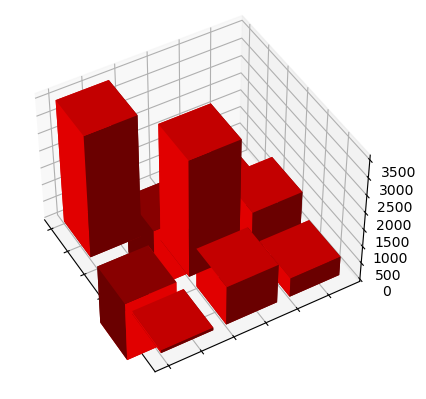

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps
from scipy import linalg as spla

# Structural properties
m = 1000.0; 
c = 2000.0;
EI = 2.1E11*3.36E-6;
L = 4.0;
k = 2*12*EI/L**3;
MM = np.diag([1, 1, 1])*m;
KK = np.array([ [2, -1, 0], [-1, 2, -1], [0, -1, 1]])*k
CC = np.diag([1, 0.5, 0])*c;

# Calculate undamped modes and frequencies
lam,v = spla.eig(KK,MM) #Solve eigenvalue problem using scipy 
#lam = np.reshape(lam, (1, lam.shape[0]))
v[:,0] = v[:,0]/np.max(v[:,0]) #Normalize the eigenvector
v[:,1] = v[:,1]/np.max(v[:,1])
f = np.real(lam)**0.5/2/np.pi #Natural frequencies in Hz
omega = f*2*np.pi # Natural frequencies in rad/s

# Print result
print('M_modal=')
print(v.T @ MM @ v)

print('C_modal=')
print(v.T @ CC @ v)

print('K_modal=')
print(v.T @ KK @ v)

# Plot M, K or C matrix
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

y = [1, 1, 1, 2, 2, 2, 3, 3, 3]
x = [1,2,3,1,2,3,1,2,3]

bar_height = np.matrix.flatten(v.T @ CC @ v) # Select modal K matrix

# Plotting 3D bars
ax1.bar3d(x, y, np.zeros(9), np.ones(9)*0.8, np.ones(9)*0.8, bar_height, color="red")
ax1.view_init(elev=45, azim=-30, roll=0)
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
plt.show()



We see that the modal $\mathbf{M}$ and $\mathbf{K}$ matrices are diagonal, but the damping is not. This is because we have not included $\mathbf{C}$ in the eigenvalue problem. 

We want to calculate the damping ratios of the structure, and we can not neglect the damping when solving the eigenvalue problem. We assume that the homogenous solution of the differential equation has the following form:

$$ \mathbf{y} = \mathbf{v}e^{st}  $$

We further insert this solution into the differential equation to obtain the quadratic eigenvalue problem:

$$\left( s^2\mathbf{M} + s\mathbf{C} +\mathbf{K} \right) \mathbf{v} = \mathbf{0}   $$

The eigenvalues come in complex conjugate pairs $s = a \pm ib$, and the corresponding eigenvectors also come in complex conjugate pairs. This is to ensure that the sum of the imaginary parts is zero such that the dynamic response is real. The response associated with one of the eigenvalues and eigenvectors is

$$ \mathbf{y} = \mathbf{v}e^{st} = \mathbf{v}e^{at}\left( \cos (bt) + i \sin(bt) \right)  $$

This corresponds to the free vibration response of a damped single degree of freedom system:

$$ y(t) = e^{-\zeta \omega_n t}\left( C_1\cos (\omega_D t) + C_2 \sin(\omega_D t) \right)  $$

The eigenvalue can thus be defined as $s = -\zeta \omega_n \pm i \omega_D=-\zeta \omega_n \pm i \omega_n\sqrt{1-\zeta^2}$. The undamped natural frequency can thus be obtained as $\omega_n = |s|$ and the daping ratio is minus the real part divided by the absolute value of the eigenvalue $\zeta = -\Re(s)/|\omega_n| $

It is convenient to avoid solving the quadratic eigenvalue problem by transforming the system of second-order differential equations to a system of first-order differential equations. This is often referred to as transforming the system to state-space. Note that there are no approximations involved in this transform.

$$ \ddot{\mathbf{y}} + \mathbf{M}^{-1} \mathbf{C} \dot{\mathbf{y}} +\mathbf{M}^{-1} \mathbf{K} \mathbf{y} = \mathbf{M}^{-1}  \mathbf{X}(t)    $$

$$ \left[ \begin{array}{c} \dot{\mathbf{y}}\\ \ddot{\mathbf{y}} \end{array} \right] 
+ \left[ \begin{array}{c} \mathbf{0}& -\mathbf{I} \\ \mathbf{M}^{-1} \mathbf{K} & \mathbf{M}^{-1} \mathbf{C} \end{array} \right] 
\left[ \begin{array}{c} \mathbf{y}\\ \dot{\mathbf{y}} \end{array} \right] 
= \left[ \begin{array}{c} \mathbf{0}\\ \mathbf{M}^{-1}  \mathbf{X}(t) \end{array} \right]  $$

The system can then be represented by the state vector $\mathbf{z}=\left[ \begin {array}{cc} \mathbf{y} & \dot{\mathbf{y}} \end{array}\right]^\text{T}$ and the system of first order differential equations reads

$$ \dot{\mathbf{z}} = \mathbf{A}\mathbf{z} + \mathbf{B}\mathbf{X}(t)   $$

$$\mathbf{A} = \left[ {\begin{array}{c} {\mathbf{0}}&{\mathbf{I}}\\ {-\mathbf{M}^{-1} \mathbf{K}}&{-\mathbf{M}^{-1} \mathbf{C}} \end{array}} \right]   $$

$$ \mathbf{B} = \left[ \begin{array}{c} \mathbf{0} \\ \mathbf{M}^{-1} \end{array} \right]   $$

Assuming once again that the solution is on the form 

$$ \mathbf{y} = \mathbf{v}e^{st}  $$

The eigenvalue problem reads

$$\left( \mathbf{A}-\mathbf{I}s \right)\mathbf{v} = \mathbf{0} $$

The eigenvalues can thus be obtained as the eigenvalues of the state matrix $A$


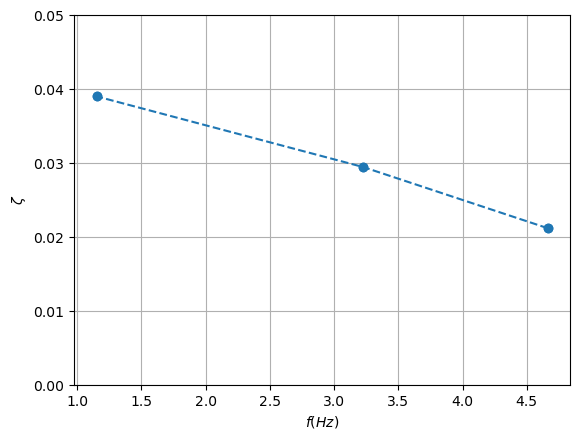

In [3]:
# Define state matrix A

A = np.zeros((6,6))
A[3:6,0:3] = -np.linalg.inv(MM) @ KK
A[3:6,3:6] = -np.linalg.inv(MM) @ CC
A[0:3,3:6] = np.eye(3)

s,vec = np.linalg.eig(A)
f = np.abs(s)/2/np.pi
zeta = -np.real(s)/np.abs(s)

plt.figure()
plt.plot(f,zeta,'o--')
plt.ylim(0,0.05)
plt.grid()
plt.ylabel('$\zeta$')
plt.xlabel('$f(Hz)$');

## Question 2: Calculate the probability density functions of the responses in all dofs
We need to calculate the variance of all the response components. The variance can be obtained from the cross-spectral density matrix of the response. 

$$\mathbf{S_y}(\omega)  = \bar{\mathbf{H}}(\omega) \mathbf{S_X}(\omega) \mathbf{H}^\text{T}(\omega)   $$

Here, $\mathbf{S_X}(\omega)$ is the cross-spectral density matrix of the loads, and the frequency response matrix is defined as follows:

$$\mathbf{H}(\omega) = \left[-\omega^2 \mathbf{M} + i\omega \mathbf{C} + \mathbf{K}   \right]^{-1}  $$

### Frequency response matrix 

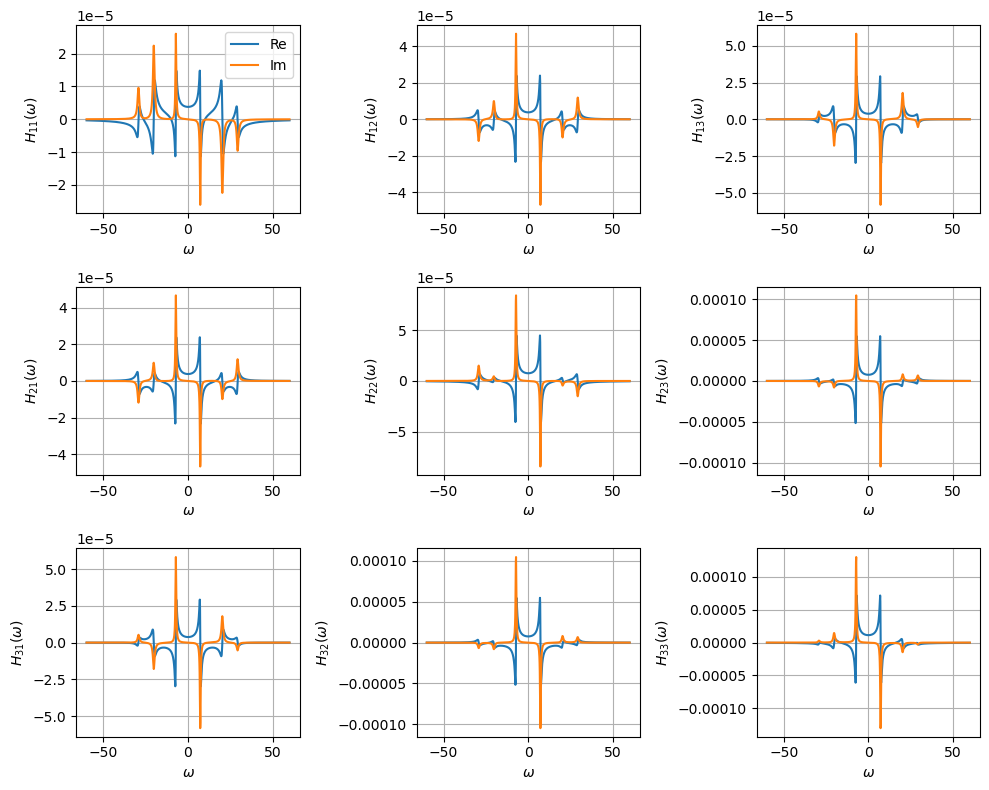

In [4]:
w = np.linspace(-60,60,1001)
HH = np.zeros((3,3,w.shape[0]),dtype=complex)
for k in range(w.shape[0]):
    HH[:,:,k] = np.linalg.inv(-w[k]**2*MM + 1j*w[k]*CC + KK)

    
fig, axs = plt.subplots(3,3,figsize=(10,8))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        ax.plot(w,np.real(HH[k1,k2,:]),label='Re')
        ax.plot(w,np.imag(HH[k1,k2,:]),label='Im')
        ax.set_ylabel(('$H_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        
        if k1==0 and k2==0:
            ax.legend()
            
        
        
plt.tight_layout()

### Load cross-spectral density matrix

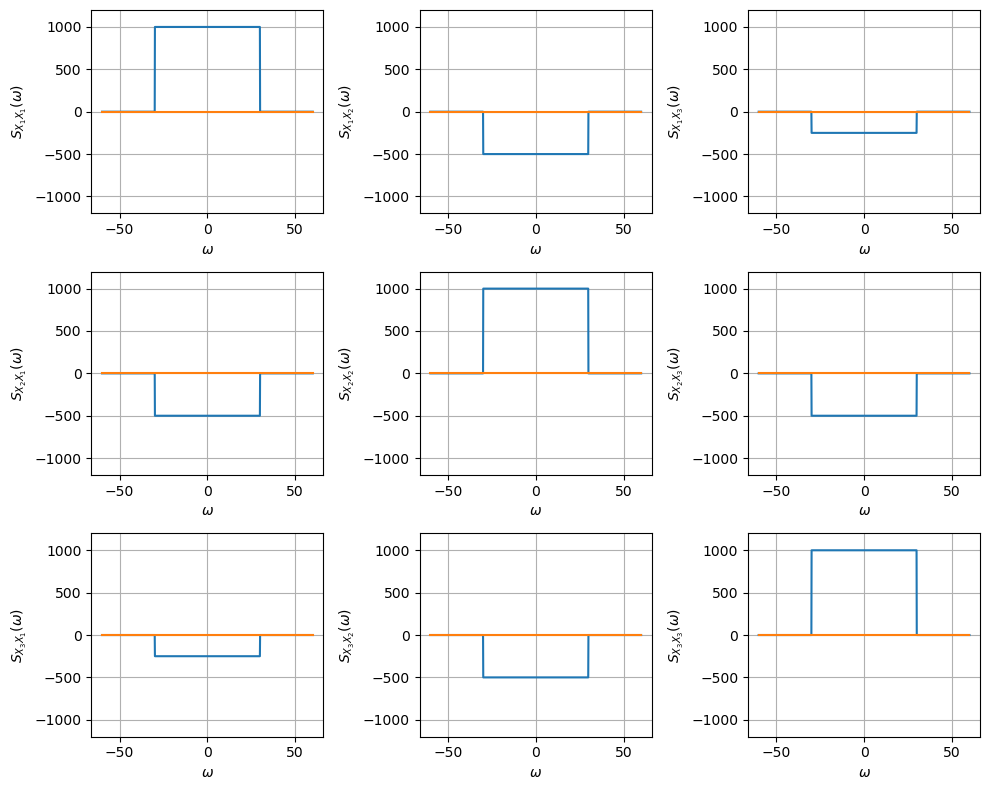

In [5]:
SxSx = np.zeros((3,3,w.shape[0]));
for k1 in range(3):
    for k2 in range(3):
        SxSx[k1,k2,:] = 0
        SxSx[k1,k2,np.abs(w)<30] = 1.0
SxSx[0,1,:] = -0.5*SxSx[0,1,:]
SxSx[0,2,:] = -0.25*SxSx[0,2,:]
SxSx[1,0,:] = -0.5*SxSx[1,0,:]
SxSx[1,2,:] = -0.5*SxSx[1,2,:]
SxSx[2,0,:] = -0.25*SxSx[2,0,:]
SxSx[2,1,:] = -0.5*SxSx[2,1,:]

SxSx =SxSx*10**3;

        

fig, axs = plt.subplots(3,3,figsize=(10,8))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        ax.plot(w,np.real(SxSx[k1,k2,:]))
        ax.plot(w,np.imag(SxSx[k1,k2,:]))
        ax.set_ylabel(('$S_{X_' + str(k1+1) + 'X_' + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.set_ylim(-1200,1200)
        ax.grid(True)
plt.tight_layout()

### Response cross-spectral density matrix

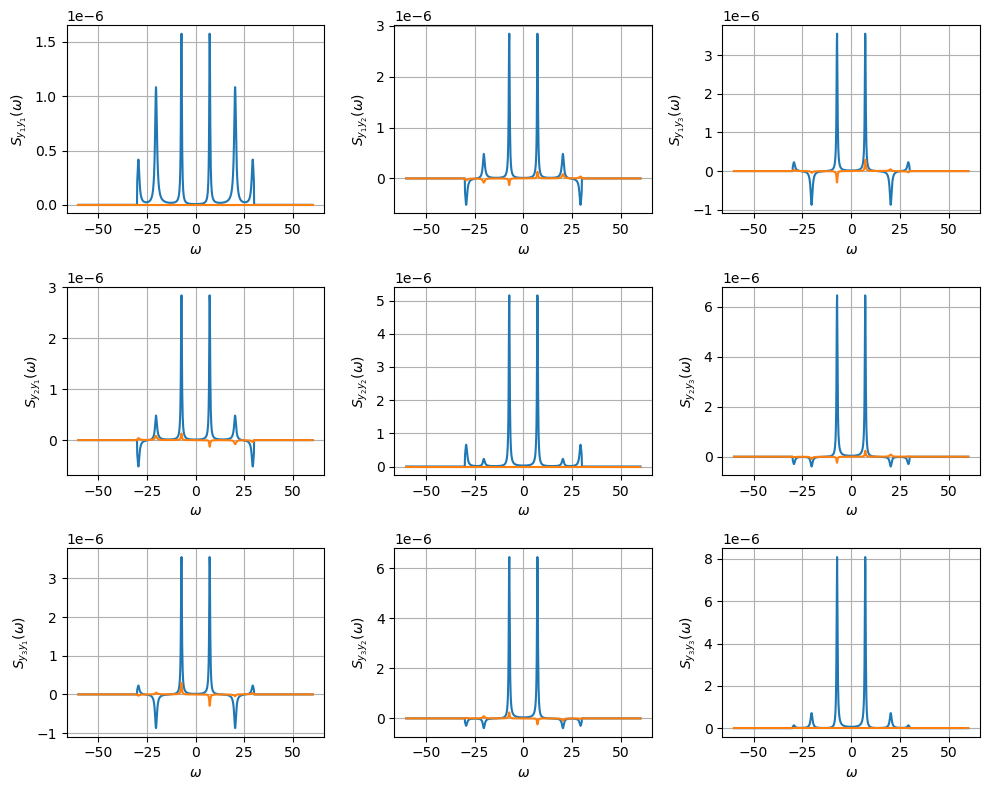

In [6]:
SySy = np.zeros((3,3,w.shape[0]),dtype=complex)
for k in range(w.shape[0]):
    SySy[:,:,k] = np.matmul(np.conj(HH[:,:,k]),np.matmul(SxSx[:,:,k],HH[:,:,k].T))
    
fig, axs = plt.subplots(3,3,figsize=(10,8))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        ax.plot(w,np.real(SySy[k1,k2,:]))
        ax.plot(w,np.imag(SySy[k1,k2,:]))
        ax.set_ylabel(('$S_{y_' + str(k1+1) + 'y_' + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
plt.tight_layout()

### Response probability density functions

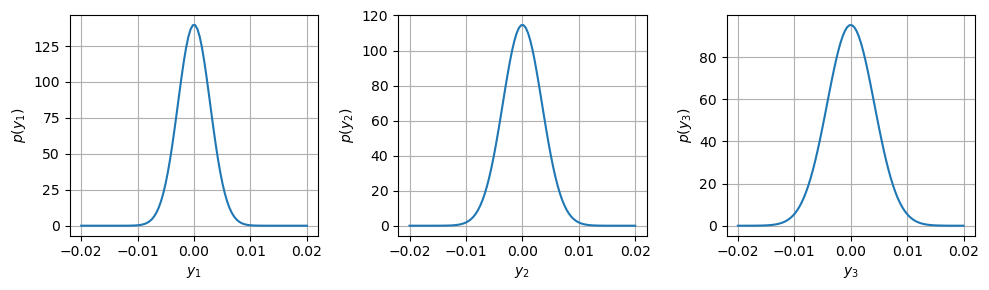

In [7]:
mu_y1 = 0;
sigma_y1 = np.real(np.sqrt(np.trapz(SySy[0,0,:],w)))
mu_y2 = 0;
sigma_y2 = np.real(np.sqrt(np.trapz(SySy[1,1,:],w)))
mu_y3 = 0;
sigma_y3 = np.real(np.sqrt(np.trapz(SySy[2,2,:],w)))

y = np.linspace(-2/100,2/100,100)
pdf_y1 = sps.norm.pdf(y,mu_y1,sigma_y1)
pdf_y2 = sps.norm.pdf(y,mu_y1,sigma_y2)
pdf_y3 = sps.norm.pdf(y,mu_y1,sigma_y3)

fig, axs = plt.subplots(1,3,figsize=(10,3))
axs[0].plot(y,pdf_y1)
axs[0].set_ylabel('$p(y_1)$')
axs[0].set_xlabel('$y_1$')
axs[0].grid(True)

axs[1].plot(y,pdf_y2)
axs[1].set_ylabel('$p(y_2)$')
axs[1].set_xlabel('$y_2$')
axs[1].grid(True)

axs[2].plot(y,pdf_y3)
axs[2].set_ylabel('$p(y_3)$')
axs[2].set_xlabel('$y_3$')
axs[2].grid(True)

plt.tight_layout()





## Question 3: Calculate the probability density functions and the shear and moment correlation coefficient in one of the columns between degrees of freedom 1 and 2. 

The shear force and the bending moment in the middle column depends on the response in degrees of freedom $y_1$ and $y_2$

$$V = \frac{12EI}{L^3} \left(y_2-y_1  \right) $$

$$M = \frac{6EI}{L^2} \left(y_2-y_1  \right) $$

This can conveniently be expressed as a linear transform. 

$$\left[ \begin{array}{c}  V \\ M  \end{array} \right] = \left[ \begin{array}{ccc}  -\frac{12EI}{L^3} &  \frac{12EI}{L^3} & 0 \\ -\frac{6EI}{L^2} & \frac{6EI}{L^2} & 0 \end{array} \right]  \left[ \begin{array}{c} y_1 \\ y_2 \\ y_3 \end{array} \right]  $$

$$\mathbf{F}(t) = \mathbf{T} \mathbf{y}(t)  $$

The cross-correlation matrix of $\mathbf{F}$ is defined as

$$ \mathbf{R_F}(\tau) = E\left[\mathbf{F}(t) \mathbf{F}^\text{T}(t+\tau)  \right]$$

Inserting the relation between $\mathbf{F}$ and $\mathbf{y}$

$$ \mathbf{R_F}(\tau) = E\left[\mathbf{T} \mathbf{y}(t)  \mathbf{y}^\text{T}(t+\tau) \mathbf{T}^\text{T}  \right]$$

The transformation matrix is deterministic.

$$ \mathbf{R_F}(\tau) =\mathbf{T}  E\left[ \mathbf{y}(t)  \mathbf{y}^\text{T}(t+\tau)\right] \mathbf{T}^\text{T}  $$

The cross-correlation matrix of the load effects $\mathbf{F}$ can be expressed by the cross-correlation matrix of the responses $\mathbf{y}$ as follows.

$$ \mathbf{R_F}(\tau) =\mathbf{T}  \mathbf{R_y}(\tau) \mathbf{T}^\text{T}  $$

The cross-spectral density matrix of the load effects is obtained by taking the Fourier transform of the cross-correlation matrix.
 
$$ \mathbf{S_F}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty}\mathbf{R_F}(\tau) e^{-i\omega t} \:\text{d}\tau $$

The following relation between the cross-spectral density of the load effects and the responses are obtained.

$$ \mathbf{S_F}(\omega) =\mathbf{T}  \mathbf{S_y}(\omega) \mathbf{T}^\text{T}  $$

### Load effect cross-spectral density matrix

We can then calculate and plot the cross-spectral density matrix:


$$ \mathbf{S_F}(\omega) = \left[ \begin{array}{c c}
{S _{V}(\omega)} & {S _{VM}(\omega)}  \\
{S_{MV}(\omega)}&{S_{M}(\omega)} \\
\end{array} \right] $$


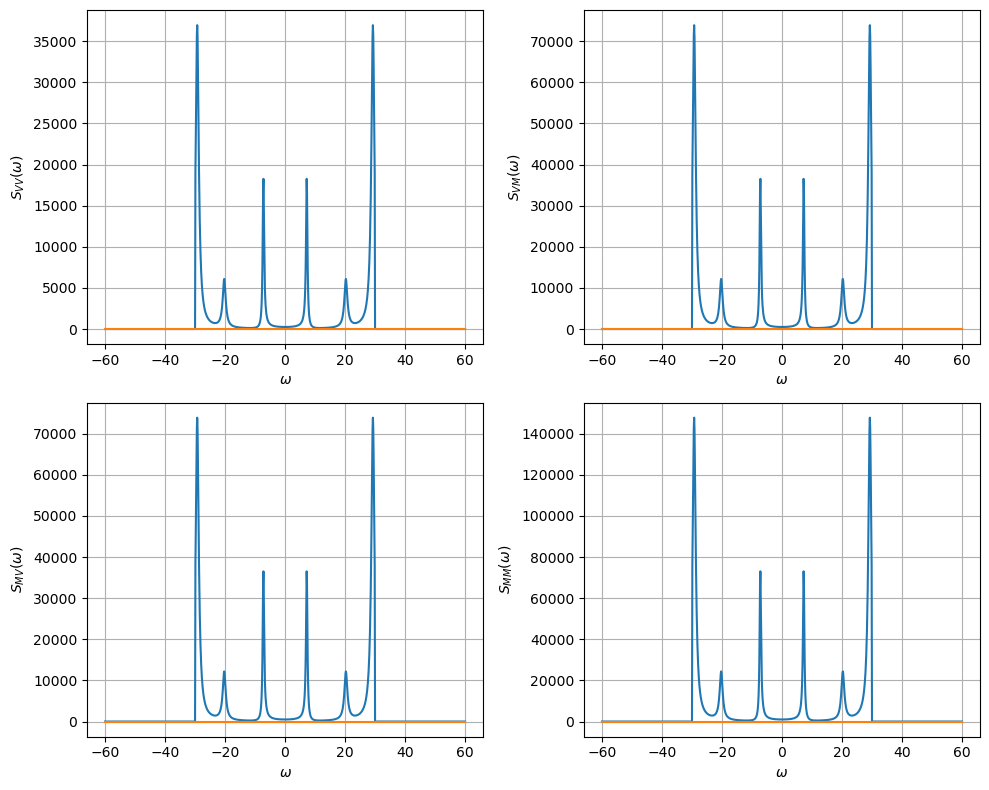

In [8]:
SfSf = np.zeros((2,2,w.shape[0]),dtype=complex)
TT = np.array([[-12*EI/L**3, 12*EI/L**3, 0], [ -6*EI/L**2, 6*EI/L**2, 0]]);
for k in range(w.shape[0]):
    SfSf[:,:,k] = TT @ SySy[:,:,k] @ TT.T
ylabels = np.array(['V', 'M'])    
fig, axs = plt.subplots(2,2,figsize=(10,8))    
for k1 in range(2):
    for k2 in range(2):
        ax = axs[k1,k2]
        ax.plot(w,np.real(SfSf[k1,k2,:]))
        ax.plot(w,np.imag(SfSf[k1,k2,:]))
        ax.set_ylabel(('$S_{' + ylabels[k1] + ylabels[k2] + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
plt.tight_layout()

### Load effect probability distribution and correlation coefficient


The variances of $V$ and $M$ can be found from the integrated spectrums:

 $$\sigma_V^2=  
\int_{-\infty}^{\infty}
S _{V}(\omega)
\: \text{d} \omega$$

 $$\sigma_M^2= 
\int_{-\infty}^{\infty}
S _{M}(\omega)
\: \text{d} \omega
$$

The covariances $\sigma_{MV}^2=\sigma_{VM}^2$ are found by integration of the cross-spectral densitity:

 $$\sigma_{MV}^2= 
\int_{-\infty}^{\infty}
S _{MV}(\omega)
\: \text{d} \omega
$$

The correlation coefficient between $V$ and $M$ is defined as:

$$
\rho_{MV}=\frac{\sigma_{MV}^2}{\sigma_V \sigma_M}
$$


Correlation coefficient of V and M 1.0


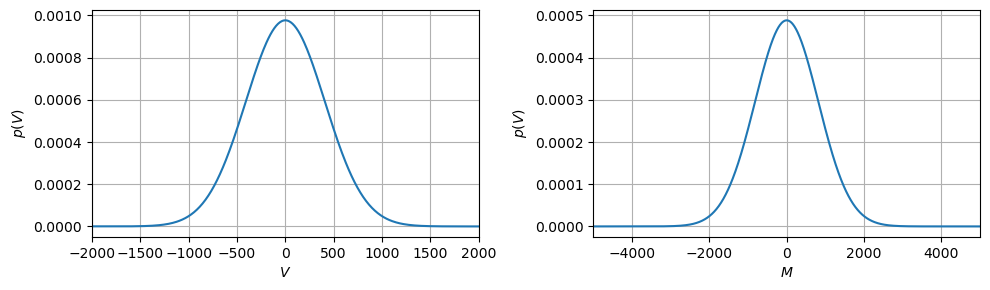

In [9]:
mu_V = 0;
sigma_V = np.real(np.sqrt(np.trapz(SfSf[0,0,:],w)))
mu_M = 0;
sigma_M = np.real(np.sqrt(np.trapz(SfSf[1,1,:],w)))


y = np.linspace(-5000,5000,1000)
pdf_V = sps.norm.pdf(y,mu_V,sigma_V)
pdf_M = sps.norm.pdf(y,mu_M,sigma_M)

fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(y,pdf_V)
axs[0].set_ylabel('$p(V)$')
axs[0].set_xlabel('$V$')
axs[0].grid(True)
axs[0].set_xlim(-2000,2000)

axs[1].plot(y,pdf_M)
axs[1].set_ylabel('$p(V)$')
axs[1].set_xlabel('$M$')
axs[1].grid(True)
axs[1].set_xlim(-5000,5000)
plt.tight_layout()

rho_VM = np.real(np.trapz(SfSf[0,1,:],w))/sigma_V/sigma_M
print(('Correlation coefficient of V and M ' + str(np.round(rho_VM*1000)/1000)))



The correlation coefficient of the shear force and the bending moment is one. This can also be seen directly from the equations since both depends only on $y_2-y_1$ 

$$V = \frac{12EI}{L^3} \left(y_2-y_1  \right) $$

$$M = \frac{6EI}{L^2} \left(y_2-y_1  \right) $$

